In [ ]:
# Part 1: Importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras.utils
import os
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# Part 2: Importing TensorFlow and ImageDataGenerator
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Part 3: Defining image size and folder path
picture_size = 224
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/lung'

In [ ]:
# Part 4: Setting batch size and creating data generators
batch_size = 128
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()
datagen_test = ImageDataGenerator()
train_set = datagen_train.flow_from_directory(folder_path+"/Train",
 target_size=(picture_size, picture_size),
 color_mode="rgb",
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)
test_set = datagen_test.flow_from_directory(folder_path+"/Test",
 target_size=(picture_size, picture_size),
 color_mode="rgb",
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=False)
val_set = datagen_val.flow_from_directory(folder_path+"/Val",
 target_size=(picture_size, picture_size),
 color_mode="rgb",
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=False)

Found 1875 images belonging to 3 classes.


In [ ]:
# Part 5: Defining the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_5 (Bat  (None, 224, 224, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 batch_normalization_6 (Bat  (None, 112, 112, 128)     512       
 chNormalization)                                                
                                                      

In [ ]:
# Part 6: Training the model
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_set,validation_data=val_set,epochs=30)
model.save("lung_cancer_model.h5")

Epoch 1/30
88/88 [==============================] - 83s 794ms/step - loss: 4.3239 - accuracy: 0.8492 - val_loss: 4.2217 - val_accuracy: 0.3872
Epoch 2/30
88/88 [==============================] - 65s 739ms/step - loss: 0.1567 - accuracy: 0.9433 - val_loss: 1.3133 - val_accuracy: 0.6576
Epoch 3/30
88/88 [==============================] - 63s 720ms/step - loss: 0.1119 - accuracy: 0.9588 - val_loss: 0.3392 - val_accuracy: 0.8731
Epoch 4/30
88/88 [==============================] - 63s 719ms/step - loss: 0.0543 - accuracy: 0.9811 - val_loss: 0.1616 - val_accuracy: 0.9456
Epoch 5/30
88/88 [==============================] - 63s 711ms/step - loss: 0.0415 - accuracy: 0.9864 - val_loss: 0.1784 - val_accuracy: 0.9552
Epoch 6/30
88/88 [==============================] - 63s 714ms/step - loss: 0.0364 - accuracy: 0.9880 - val_loss: 0.1086 - val_accuracy: 0.9691
Epoch 7/30
88/88 [==============================] - 63s 715ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.2277 - val_accuracy: 0.9429

In [ ]:
# Part 7: Evaluating on the validation set
loss, accuracy = model.evaluate(val_set)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

15/15 [==============================] - 9s 564ms/step - loss: 0.0866 - accuracy: 0.9792
Validation loss: 0.08660732954740524
Validation accuracy: 0.979200005531311


In [ ]:
# Part 8: Evaluating on the test set
loss, accuracy = model.evaluate(test_set)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

15/15 [==============================] - 8s 549ms/step - loss: 0.0551 - accuracy: 0.9861
Test loss: 0.05508797988295555
Test accuracy: 0.986133337020874


In [ ]:
# Part 9: Importing necessary modules for metrics
import numpy as np
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

15/15 [==============================] - 8s 544ms/step
[[612   0  13]
 [  0 625   0]
 [ 13   0 612]]


<Figure size 640x480 with 0 Axes>

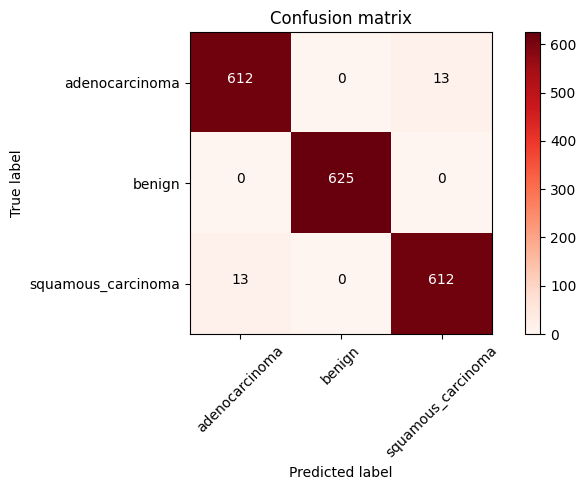

In [ ]:
# Part 10: Making predictions and plotting confusion matrix
predictions = model.predict(test_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_set.classes
class_names = test_set.class_indices.keys()
from sklearn.metrics import confusion_matrix, classification_report
import itertools
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Reds):
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(7, 5))
 plt.imshow(cm, interpolation='nearest', cmap=cmap)
 plt.title(title)
 plt.colorbar()
 tick_marks = np.arange(len(classes))
 plt.xticks(tick_marks, classes, rotation=45)
 plt.yticks(tick_marks, classes)
 fmt = '.0f'
 thresh = cm.max() / 2.
 for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[j, i] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
# Part 11: Calculating precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1_score: {f1_score}')

Precision: 0.9861333333333334
Recall: 0.9861333333333334
F1_score: 0.9861333333333334
